# Standford Open Policing Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ri = pd.read_csv("../data/police.csv")

In [3]:
#each row is a traffic stop
print(ri.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [4]:
# generate a dataframe to see if an entry is null
ri.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [5]:
# useful trick to take the sum() of this aboive DF 
# outputs counts of missing value in each cols
ri.isnull().sum() #sum() sums up each columns by default.

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [6]:
#Dropping columns
ri.shape 
#notice that county_name contains nth but null value, we can drop this column
#also drop the state col, since its only 1 state in this df
ri.drop(["county_name","state"], axis = "columns", inplace=True) #drop along the col axis, and it take inplace: avoid an assignment statement
print(ri.shape)

(91741, 13)


When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the driver_gender column will be critical to many of your analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset

In [7]:
#Dropping rows
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=["driver_gender"], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

#we dropped about 5000 rows, which is a small portion

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


In [8]:
#check datatype in each column
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

## Data type matters in Pandas

Avoid using string in Pandas as much as possible.   

Each datatype in the Series will affect what operation can be used:    
int and float: enables mathematical operations   
datetime: date-based attribute and method. (e.g. partial slicing, resample etc)    
category: lesser memory and fast searching   
bool: enable mathmatical and logical operation   

use astype() to convert datatype

In [9]:
# "is_arrested should be bool"
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Check the data type of 'is_arrested'
print(ri.is_arrested.dtypes)

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype("bool")

# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtypes)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
object
bool


In [10]:
# Prepare the DateTime Index
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=" ")

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [11]:
# Set 'stop_datetime' as the index
ri.set_index("stop_datetime", inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


In [12]:
#counting unique value: value_counts(): best suited for categorical data
print(ri.stop_outcome.value_counts())
print(ri.stop_outcome.value_counts().sum())

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64
86536


In [13]:
# normalised the outcome to output proportions
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [14]:
ri.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [15]:
#row filter for white race
white = ri[ri.driver_race == "White"]
white.shape

(61870, 13)

In [16]:
white.stop_outcome.value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [17]:
# Does gender affects violation ?
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


In [18]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == "F"]

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == "M"]

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [19]:
# Does gender affects who gets a ticket for speeding? 
# multiple row filter
female_and_arrested = ri[(ri.driver_gender == "F") & (ri.is_arrested == True)]
female_and_arrested.shape

(669, 13)

In [20]:
female_or_arrested = ri[(ri.driver_gender == "F") | (ri.is_arrested == True)]
female_or_arrested.shape

(26183, 13)

In [21]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == "F") & (ri.violation == "Speeding")]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == "M") & (ri.violation == "Speeding")]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

#seems like no influence, about 95 percent for each gender gets a ticket for speeding

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [22]:
#taking the mean of a boolean Series
ri.is_arrested.value_counts(normalize=True) #3% gets arrested, this method works for bool or obj

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [23]:
ri.is_arrested.mean() # only works for bool

0.0355690117407784

In [24]:
# study the arrest rate by police district
ri.district.unique() # 6 districts

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [25]:
#arrest rate for zone K1
ri[ri.district == "Zone K1"].is_arrested.mean()

0.024349083895853423

In [26]:
#using groupby()
ri.groupby("district").is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [27]:
#groupby multiple category
ri.groupby(["district","driver_gender"]).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [28]:
# driver_gender and vehical searches
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtypes)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


In [29]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == "F"].search_conducted.mean())
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == "M"].search_conducted.mean())
# Calculate the search rate for both groups simultaneously
print(ri.groupby("driver_gender").search_conducted.mean()) #search rate for male is twice of female, why ?

0.019180617481282074
0.04542557598546892
driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [30]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(["driver_gender","violation"]).search_conducted.mean())
# Reverse the ordering to group by violation before gender
print(ri.groupby(["violation","driver_gender"]).search_conducted.mean()) #for all violation, search rate is all higher for male

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64
violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.05492

In [31]:
# examine search_type
print(ri.search_conducted.value_counts())
print(ri.search_type.value_counts(dropna=False)) #value_count exclude missing value by default
#NaN number matches False in search_conducted
# only 5 types of search_type, rest are mixed of those 5 types

False    83229
True      3307
Name: search_conducted, dtype: int64
NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident 

In [32]:
# look for all "Inventory" search_type
# check if a string is present in each element in a given col
#str.contains return True if string is found
# return false for a missing value
# datatype is bool
ri["inventory"] = ri.search_type.str.contains("Inventory", na=False)
ri.inventory.dtype

dtype('bool')

In [33]:
ri.inventory.sum()

441

In [34]:
#this is NOT percentage of inventory search done in all searches
#because it includes ALL stops, which some of them where search is not even done
ri.inventory.mean()

0.0050961449570121106

In [35]:
#instead we need to filter rows where search is actually done
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

In [36]:
#protective frisk ? 
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtypes)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [37]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby("driver_gender").frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


In [38]:
print(ri.head())

                      stop_date stop_time driver_gender driver_race  \
stop_datetime                                                         
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   
2005-02-20 17:15:00  2005-02-20     17:15             M       White   
2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                                      violation_raw  violation  \
stop_datetime                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   
2005-02-24 01:20:00                        Speeding   Speeding   

                     search_conducted s

In [39]:
# Does time affect arrest rate ?
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
# since datetime index dont belong to any col, so groupby("hour") wont work. need to use index.hour in groupby()
#time format for hour: 0:mn, 12:nn
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


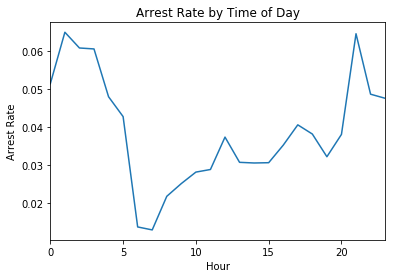

In [40]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

# Display the plot
plt.show()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


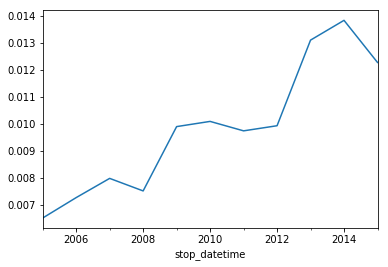

In [41]:
#Drug-related-stop increases over the years
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample("A").mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

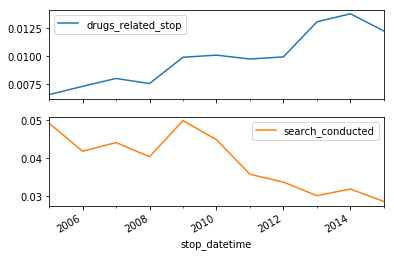

In [42]:
#could it be we searched more cars ? hence more drug-related stop ?
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample("A").mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis="columns")

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [45]:
#crosstab() gives a cross-tabulation
#think of it as a frequency table
# pass in two Pandas Series with categoryical data (optional ?)
# it gives how many times each combination occurs in the dataset
table = pd.crosstab(ri.driver_race, ri.driver_gender)
print(table)

driver_gender      F      M
driver_race                
Asian            551   1838
Black           2681   9604
Hispanic        1953   7774
Other             53    212
White          18536  43334


In [49]:
table = table.loc["Asian":"Hospanic"]
print(table)

driver_gender     F     M
driver_race              
Asian           551  1838
Black          2681  9604
Hispanic       1953  7774


<function matplotlib.pyplot.show(*args, **kw)>

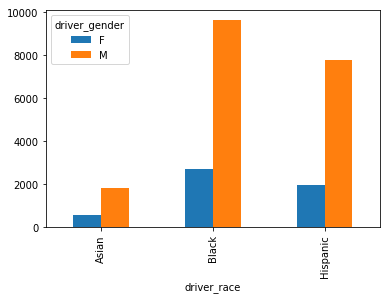

In [51]:
table.plot(kind="bar")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

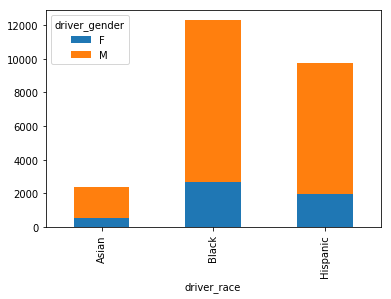

In [53]:
#stacked bar
table.plot(kind="bar",stacked=True)
plt.show

In [54]:
# violation by district: K zone
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc["Zone K1":"Zone K3"])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc["Zone K1":"Zone K3"]

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

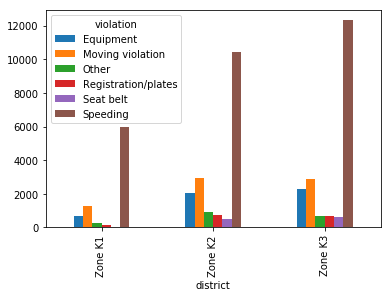

In [55]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind="bar")

# Display the plot
plt.show()

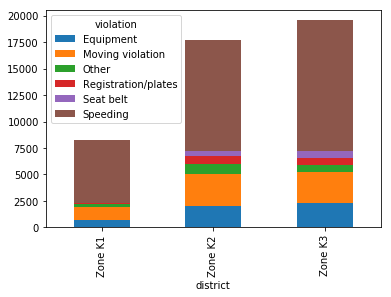

In [56]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind="bar", stacked=True)

# Display the plot
plt.show()

## Changing string into bool using mapping

astype() wont work if the string is not True or False   
use a dictionay like mapping = {"up":True, "down":False}   
then chain .map(mapping) on the column   

In [58]:
#how often search conducted after each violation
search_rate = ri.groupby("violation").search_conducted.mean()
print(search_rate)

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64


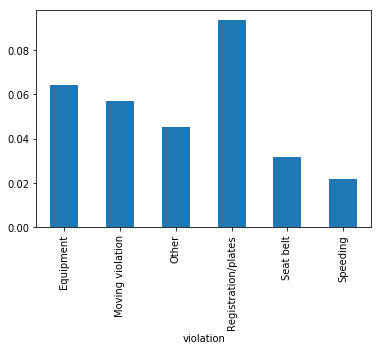

In [59]:
search_rate.plot(kind="bar")

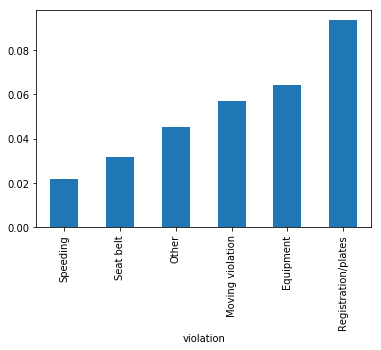

In [62]:
search_rate.sort_values().plot(kind="bar")

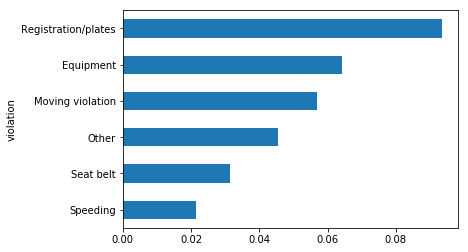

In [64]:
search_rate.sort_values().plot(kind="barh")

In [65]:
#converting stop duration to numbers
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {"0-15 Min":8,"16-30 Min":23,"30+ Min":45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


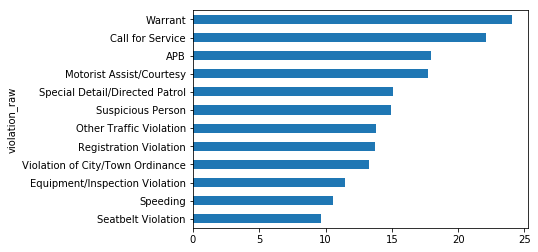

In [66]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby("violation_raw").stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby("violation_raw").stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind="barh")

# Display the plot
plt.show()

## Weather condition vs Police

In [3]:
weather = pd.read_csv("../data/weather.csv")
print(weather.head())

       STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   
3  USW00014765  2005-01-04  42.0    39    45  6.93  16.1   1.0   NaN   NaN   
4  USW00014765  2005-01-05  36.0    28    43  7.83  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
3  ...   NaN   1.0   1.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4  ...   NaN   1.0   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  

[5 rows x 27 columns]


In [68]:
#examing windspeed
# AWND = averge windspeed in miles per hour
# WSF2 = fastest 2-minute wind speed
weather[["AWND","WSF2"]].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


In [69]:
# validate windspeed
weather[["AWND","WSF2"]].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


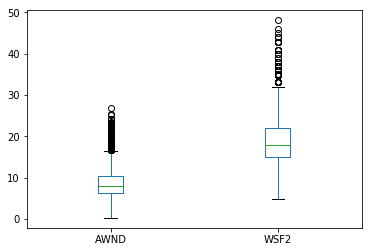

In [70]:
weather[["AWND","WSF2"]].plot(kind="box")

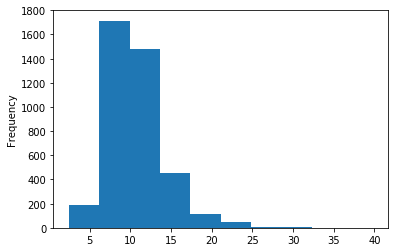

In [71]:
weather["WDIFF"] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind="hist") # no value below zero

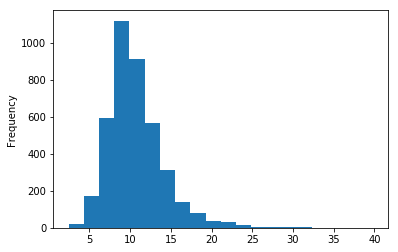

In [72]:
weather.WDIFF.plot(kind="hist", bins=20)

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


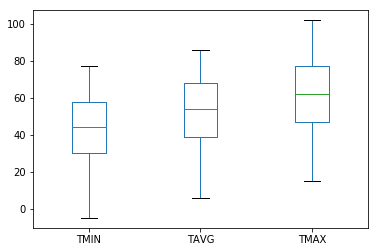

In [74]:
# temperature stats of the weather DF
# Describe the temperature columns
print(weather[["TMIN","TAVG","TMAX"]].describe())

# Create a box plot of the temperature columns
weather[["TMIN","TAVG","TMAX"]].plot(kind="box")

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


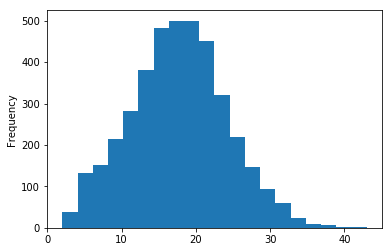

In [75]:
# Create a 'TDIFF' column that represents temperature difference
weather["TDIFF"] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind="hist", bins = 20)

# Display the plot
plt.show() #no negative value, also has a normal distribution, which lots of natural events occurs that way

In [76]:
weather.shape

(4017, 29)

In [77]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WDIFF', 'TDIFF'],
      dtype='object')

In [78]:
# slicing data for temperature and create a new DF for it
temp = weather.loc[:,"TAVG":"TMAX"] # select all rows and then the 3 cols we want
temp.shape

(4017, 3)

In [79]:
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [80]:
#sum of col
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [81]:
# sum of each row
temp.sum(axis="columns").head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

In [82]:
# mapping the stop duration again
mapping_length = {"0-15 Min":"short","16-30 Min":"medium","30+ Min":"long"}
ri["stop_length"] = ri.stop_duration.map(mapping_length)
ri.stop_length.dtype

dtype('O')

In [83]:
#memory between string and categorical data
ri.stop_length.memory_usage(deep=True)

8689481

In [88]:
#convert from string to categrical data
cats = ["short","medium","long"]
ri["stop_length"]= ri.stop_length.astype("category",ordered=True,categories=cats) #orders follow what is defined in the list

In [90]:
#memory of the categorical data
ri.stop_length.memory_usage(deep=True)

3400530

In [91]:
ri.stop_length.head() 

stop_datetime
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): [short < medium < long]

In [92]:
# category permits comparison, filter now
ri[ri.stop_length > "short"].shape


(16959, 17)

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:   

WT05 indicates "Hail"   
WT11 indicates "High or damaging winds"   
WT17 indicates "Freezing rain"   
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

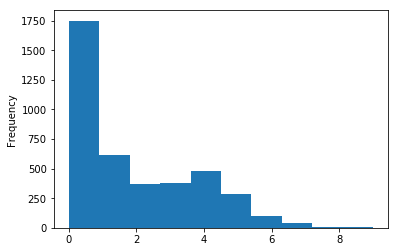

In [93]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,"WT01":"WT22"]

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis="columns")

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather["bad_conditions"].plot(kind="hist")

# Display the plot
plt.show()

# most day has 0 bad conditions, only small portion has more than 4 bad conditions

In [94]:
#raing the weather conditions
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping_rate = {0:'good', 1:'bad', 2:'bad', 3:"bad",4:"bad",5:"worse",6:"worse",7:"worse",8:"worse",9:"worse"}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping_rate)

# Count the unique values in 'rating'
print(weather["rating"].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [95]:
# Create a list of weather ratings in logical order
cats_rate=["good","bad","worse"]

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype("category",ordered=True,categories=cats_rate)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


/Users/XavierTang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
print(weather.rating.dtype)

category


In [101]:
#prepare DF for merging
#index will be lost during merge, so need to reset index to keep it as a col
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[["DATE","rating"]]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

In [102]:
#merge the ri and weather_rating DFs
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 18)
(86536, 20)


In [103]:
print(search_rate)

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64


In [106]:
search_rate = ri.groupby(["violation","driver_gender"]).search_conducted.mean()
print(search_rate)
print(type(search_rate)) # notice it is a Pandas series with mutiindex, not a dataframe

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64
<class 'pandas.core.series.Series'>


## multi-index Series

works similar to DF.   
Outer index can be treated like rows.      
Inner index can be treated like cols.    

In [107]:
#out index slicing
search_rate.loc["Equipment"]

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [108]:
search_rate.loc["Equipment","M"]

0.07149643705463182

In [109]:
#unstack multi-index Series gives back a DF
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [110]:
#using a pivot table to achieve instead of groupby and unstack
ri.pivot_table(index="violation",columns="driver_gender",values = "search_conducted") #mean() is the default aggrefunc for pivot_table

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [111]:
# Comparing arrest rates by weather rating
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


In [112]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby("rating").is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [113]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(["violation","rating"]).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


In [114]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc["Moving violation","bad"])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc["Speeding"])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [115]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
